## **Import Libraries**

In [ ]:
# Merge

# Set the random seed for reproducibility
import random
RAND_SEED = 612
random.seed(RAND_SEED)

# Flag to let us know if we're currently running in Google Colab or locally
import sys
IN_COLAB = 'google.colab' in sys.modules

# General libraries needed
import os
import numpy as np
import pandas as pd
import requests

## **Import Dataset**

In [ ]:
# Merge

# Import Youtube reviews dataset
import pandas as pd

# Direct URL to the raw CSV file
csv_url = 'https://huggingface.co/datasets/vsak/YouTube_spam_translation/raw/main/youtube_translate.csv'

# Use pandas to read the CSV file directly from the URL
df1 = pd.read_csv(csv_url)

# Only keep the message and category
df1 = df1.drop('gtrans_el', axis=1)

# Change the headings
new_columns = ['message','label']
df1.columns = new_columns

# Add an extra column to identify the platforms the data came from.
df1['source'] = 'social'

# Display the first few rows of the DataFrame
print(df1.head())
print(df1.info())

                                             message  label  source
0  Huh, anyway check out this you tube channel ko...      1  social
1  Hey guys check out my new channel and our firs...      1  social
2             just for test I have to say murdev.com      1  social
3         me shaking my sexy ass on my channel enjoy      1  social
4               watch v vtaRGgvGtWQ Check this out .      1  social
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  1645 non-null   object
 1   label    1645 non-null   int64 
 2   source   1645 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.7+ KB
None


In [ ]:
# Import spam email dataset

import requests, zipfile, io

# Direct URL to the enron_spam_data.zip file
zip_url = 'https://github.com/MWiechmann/enron_spam_data/raw/master/enron_spam_data.zip'

# Send a GET request to the URL
response = requests.get(zip_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Use zipfile to extract the ZIP content
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall("enron_spam_data")
else:
    print("Failed to download the file. Please check the URL and try again.")


# Path to the extracted CSV file
file_path = 'enron_spam_data/enron_spam_data.csv'

# Load the CSV file into a DataFrame
df2 = pd.read_csv(file_path)

# Only keep the message and spam/ham
df2 = df2[['Message','Spam/Ham']]

# Change the headings
df2.columns = new_columns

# Transform labels in to boolean values
df2['label'] = df2['label'].map({'spam': 1, 'ham': 0})

# Add an extra column to identify the platforms the data came from.
df2['source'] = 'email'

# Display the first five rows of the DataFrame
print(df2.head())
print(df2.info())

                                             message  label source
0                                                NaN      0  email
1  gary , production from the high island larger ...      0  email
2             - calpine daily gas nomination 1 . doc      0  email
3  fyi - see note below - already done .\nstella\...      0  email
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      0  email
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  33345 non-null  object
 1   label    33716 non-null  int64 
 2   source   33716 non-null  object
dtypes: int64(1), object(2)
memory usage: 790.3+ KB
None


In [ ]:
# SMS Dataset
# URL of the ZIP file
url = 'https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip'

# Send a GET request to download the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a .zip file
    with open('sms_spam_collection.zip', 'wb') as file:
        file.write(response.content)
    print("ZIP file downloaded successfully.")
else:
    print("Failed to download the file. Status code:", response.status_code)

import zipfile

# Path to the downloaded ZIP file
zip_file_path = 'sms_spam_collection.zip'

# Directory where you want to extract the file
extract_dir = 'Data_sms'

# File to extract
file_to_extract = 'SMSSpamCollection'

# Extract the specific file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(member=file_to_extract, path=extract_dir)
    print(f"'{file_to_extract}' extracted successfully.")

# Path to the extracted 'SMSSpamCollection' file
extracted_file_path = f'{extract_dir}/{file_to_extract}'

# Read the file into a pandas DataFrame
df3 = pd.read_csv(extracted_file_path, sep='\t', header=None, names=['label', 'message'])

# Transform labels in to boolean values
df3['label'] = df3['label'].map({'spam': 1, 'ham': 0})

# Add an extra column to identify the platforms the data came from.
df3['source'] = 'sms'

# Display the first five rows of the DataFrame
print(df3.head())
print(df3.info())

ZIP file downloaded successfully.
'SMSSpamCollection' extracted successfully.
   label                                            message source
0      0  Go until jurong point, crazy.. Available only ...    sms
1      0                      Ok lar... Joking wif u oni...    sms
2      1  Free entry in 2 a wkly comp to win FA Cup fina...    sms
3      0  U dun say so early hor... U c already then say...    sms
4      0  Nah I don't think he goes to usf, he lives aro...    sms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
 2   source   5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


In [ ]:
# Consolidate three datasets into a single Pandas DataFrame
df4 = pd.concat([df1, df2, df3])

# Display the first five rows of the DataFrame
print(df4.head())
print(df4.info())

                                             message  label  source
0  Huh, anyway check out this you tube channel ko...      1  social
1  Hey guys check out my new channel and our firs...      1  social
2             just for test I have to say murdev.com      1  social
3         me shaking my sexy ass on my channel enjoy      1  social
4               watch v vtaRGgvGtWQ Check this out .      1  social
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40933 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  40562 non-null  object
 1   label    40933 non-null  int64 
 2   source   40933 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


## **Data Preprocessing**

To enhance model performance, data preprocessing is essential. Prior to vectorization using embeddings, various techniques including regular expression (RegEx) cleaning, contraction expansion, and lemmatization are employed during the data preprocessing phase.

Firstly, missing values are checked, and 371 missing values are removed. The percentages of both spam and non-spam messages are calculated to be 54.73% and 45.27%, respectively, indicating a relatively balanced dataset. This balance is beneficial for reducing biases and enhancing the accuracy of the predictions (Tripathi, 2019).

In [ ]:
# Check whether the dataset have missing value
df4.isnull().sum() # missing values occur in message column

message    371
label        0
source       0
dtype: int64

In [ ]:
# Drop rows containing missing values
df4 = df4.dropna(subset=['message','label'])


In [ ]:
# Check the percentage of spam and ham
label_counts = df4['label'].value_counts(normalize=True) * 100
print(label_counts)

0    54.728564
1    45.271436
Name: label, dtype: float64


The following code illustrates the RegEx data cleaning process, wherein certain information that cannot be translated into vectors is substituted with equivalent text representations. For instance, phone numbers, which are series of numbers, are now replaced with the word 'phonenumber' (Jain, 2022). A function is defined to facilitate further usage. In addition to the RegEx operations, the code includes steps to convert words to lowercase as part of the data preparation process.

In [ ]:
# Define a function called 'clean_text_data' to to clean the text data and make all words lowercase.
def clean_text_data(df):
    # Standard regex-based cleaning operations
    df['message'] = df['message'].str.replace(r"\b[\w.-]+@[\w.-]+\.\w{2,4}\b", 'emailaddress', regex=True) #Email Addresses Replacement
    df['message'] = df['message'].str.replace(r"http\S+", 'webaddress', regex=True) # Web Addresses Replacement
    df['message'] = df['message'].str.replace(r"\$\d+", 'currencyamount', regex=True) # Currency Amounts Replacement
    df['message'] = df['message'].str.replace(r"\d{10}", 'phonenumber', regex=True) # Phone Numbers Replacement
    df['message'] = df['message'].str.replace(r"\d+", 'number', regex=True) # Generic Numbers Replacement
    df['message'] = df['message'].str.replace(r"[^\w\s]", '', regex=True) # Non-Alphanumeric Characters Removal
    df['message'] = df['message'].str.replace(r"\s+", ' ', regex=True) # Extra Whitespace Reduction
    df['message'] = df['message'].str.replace(r"<[^>]+>", '', regex=True) # HTML Tags Removal
    df['message'] = df['message'].str.strip() #Leading and Trailing Whitespace Removal

    # Convert all string columns to lowercase
    for column in df.select_dtypes(include=[object]).columns:
        df[column] = df[column].str.lower() # Dealing with captialization

    return df

df5 = clean_text_data(df4)

After the 'contractions' library has been installed, the 'apply_contractions' function is defined to expand contractions within the text. This step is crucial because it ensures that all forms of a word are consistent, making it easier for the model to learn from the data and potentially improving its performance.

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
import contractions

# Function to apply contractions
def apply_contractions(sentence):
    return contractions.fix(sentence)

# Applying contractions to the 'message' column
df5['message'] = df5['message'].apply(apply_contractions)

print(df5)

                                                message  label  source
0     huh anyway check out this you tube channel kob...      1  social
1     hey guys check out my new channel and our firs...      1  social
2                 just for test i have to say murdevcom      1  social
3            me shaking my sexy ass on my channel enjoy      1  social
4                    watch v vtarggvgtwq check this out      1  social
...                                                 ...    ...     ...
5567  this is the numbernd time we have tried number...      1     sms
5568                will ü b going to esplanade fr home      0     sms
5569  pity was in mood for that soany other suggestions      0     sms
5570  the guy did some bitching but i acted like id ...      0     sms
5571                          rofl its true to its name      0     sms

[40562 rows x 3 columns]


The final step is to lemmatize (normalize) the text using the popular spaCy library. Lemmatization is particularly valuable for morphologically rich languages, such as English, because it reduces words to their base or lemma form. This technique can enhance the overall performance of models by ensuring a more consistent representation of words (Kutuzov and Kuzmenko, 2019).

In [ ]:
import pandas as pd
import spacy

spacy.require_gpu()
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")


def lemmatize_with_spacy(text):
    return " ".join([token.lemma_ for token in nlp(text)])

def apply_lemmatization_in_chunks(df, chunk_size):
    # Initialize an empty DataFrame to store results
    result_df = pd.DataFrame()

    # Calculate the number of chunks
    num_chunks = len(df) // chunk_size + (1 if len(df) % chunk_size else 0)

    # Process each chunk
    for i in range(num_chunks):
        # Extract chunk as a copy to avoid SettingWithCopyWarning
        chunk = df[i*chunk_size:(i+1)*chunk_size].copy()

        #Apply lemmatization
        chunk['message'] = chunk['message'].apply(lemmatize_with_spacy)

        # Append processed chunk to result DataFrame
        result_df = pd.concat([result_df, chunk], ignore_index=True)

    return result_df


# Apply the function to your DataFrame
df5_lemmatized = apply_lemmatization_in_chunks(df5, 100)

# Takes around 18 mins to run the lemmatization

In [ ]:
# Assuming df5_lemmatized is your DataFrame
df5_lemmatized.to_pickle("/content/df5_lemmatized.pkl")

df5_lemmatized = pd.read_pickle("/content/df5_lemmatized.pkl")


In [ ]:
df5_clean = df5_lemmatized
df5_clean.head()

,message,label,source
0,huh anyway check out this you tube channel kob...,1,social
1,hey guy check out my new channel and our first...,1,social
2,just for test I have to say murdevcom,1,social
3,I shake my sexy ass on my channel enjoy,1,social
4,watch v vtarggvgtwq check this out,1,social


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Step 2: Create a combined column for stratification
df5_clean['stratify_col'] = df5_clean['label'].astype(str) + '_' + df5_clean['source']

# Step 3: Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# First split to separate out the test set
for train_index, test_index in sss.split(df5_clean, df5_clean['stratify_col']):
    df_train_test = df5_clean.iloc[train_index]
    df_test = df5_clean.iloc[test_index]

# Update stratification column based on remaining data
stratify_col_train_test = df_train_test['stratify_col']

# Step 3 (continued): Initialize another StratifiedShuffleSplit for splitting the remaining data into train and val
sss_train_val = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Second split to separate out the train and validation sets
for train_index, val_index in sss_train_val.split(df_train_test, stratify_col_train_test):
    df_train = df_train_test.iloc[train_index]
    df_val = df_train_test.iloc[val_index]

# Remove stratify column
df_train.drop(columns=['stratify_col'], inplace=True)
df_test.drop(columns=['stratify_col'], inplace=True)
df_val.drop(columns=['stratify_col'], inplace=True)

<ipython-input-15-9e23bf7c8788>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['stratify_col'], inplace=True)
<ipython-input-15-9e23bf7c8788>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['stratify_col'], inplace=True)
<ipython-input-15-9e23bf7c8788>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(columns=['stratify_col'], inplace=True)


## **Fasttext**
FastText serves as a comprehensive tool for both learning high-quality word embeddings and performing text classification efficiently.

In [ ]:
from gensim.models import FastText

# Train FastText model on the 'message' column of the training data
fasttext_model = FastText(sentences=[s.split() for s in df_train['message']], vector_size=100, window=3, min_count=1, epochs=10)

def text_to_embedding(text, model, embedding_dim=100):
    # Tokenize the text and remove out-of-vocabulary words
    words = [word for word in text.split() if word in model.wv]

    # Handle cases where there are no valid words in the sentence
    if len(words) == 0:
        return np.zeros(embedding_dim)

    # Calculate the average embedding
    embedding = np.mean([model.wv[word] for word in words], axis=0)
    return embedding

# Correctly initialize your embeddings arrays
train_embeddings = np.zeros((len(df_train['message']), fasttext_model.vector_size))
validation_embeddings = np.zeros((len(df_val['message']), fasttext_model.vector_size))
test_embeddings = np.zeros((len(df_test['message']), fasttext_model.vector_size))

# Convert texts to embeddings
for i, text in enumerate(df_train['message']):
    train_embeddings[i] = text_to_embedding(text, fasttext_model)
for i, text in enumerate(df_val['message']):
    validation_embeddings[i] = text_to_embedding(text, fasttext_model)
for i, text in enumerate(df_test['message']):
    test_embeddings[i] = text_to_embedding(text, fasttext_model)


## **Train the Multilayer Perceptron**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD


# Assuming elmo_embeddings_combined is a numpy array of your ELMo embeddings
# For example, elmo_embeddings_combined.shape might be (n_samples, embedding_dim)
# where n_samples is the number of text samples, and embedding_dim is the dimensionality of ELMo embeddings

import time
# Start timing
start_time = time.time()

# Define your MLP model
model_1 = Sequential([
    Dense(32, input_shape=(fasttext_model.vector_size,), activation='relu'),  # Corrected input_shape
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = SGD(learning_rate=0.01)
model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Split labels for the training part (assuming labels are in the same order)
train_labels = df_train['label']

# For validation and testing, apply similarly slice `labels` according to the number of rows in validation_embeddings and test_embeddings
validation_labels = df_val['label']
test_labels = df_test['label']

# Split the training data and labels
x_train = train_embeddings
y_train = df_train['label']
x_val = validation_embeddings
y_val = df_val['label']

# Train the model
history_1 = model_1.fit(x_train, y_train, epochs=150, batch_size=10, validation_data=(x_val, y_val))

# End timing
end_time = time.time()

# Calculate the time it took to train the model
time_taken = end_time - start_time

print(f"Model_1 training took {time_taken:.2f} seconds.")


Epoch 1/150
2434/2434 [==============================] - 10s 3ms/step - loss: 0.3600 - accuracy: 0.8366 - val_loss: 0.2254 - val_accuracy: 0.9177
Epoch 2/150
2434/2434 [==============================] - 7s 3ms/step - loss: 0.2038 - accuracy: 0.9237 - val_loss: 0.1952 - val_accuracy: 0.9275
Epoch 3/150
2434/2434 [==============================] - 8s 3ms/step - loss: 0.1762 - accuracy: 0.9334 - val_loss: 0.1839 - val_accuracy: 0.9281
Epoch 4/150
2434/2434 [==============================] - 7s 3ms/step - loss: 0.1608 - accuracy: 0.9390 - val_loss: 0.1607 - val_accuracy: 0.9398
Epoch 5/150
2434/2434 [==============================] - 7s 3ms/step - loss: 0.1506 - accuracy: 0.9431 - val_loss: 0.1582 - val_accuracy: 0.9375
Epoch 6/150
2434/2434 [==============================] - 7s 3ms/step - loss: 0.1433 - accuracy: 0.9462 - val_loss: 0.1497 - val_accuracy: 0.9445
Epoch 7/150
2434/2434 [==============================] - 8s 3ms/step - loss: 0.1359 - accuracy: 0.9487 - val_loss: 0.1516 - val_a

In [ ]:
# Evaluate the model
loss, accuracy = model_1.evaluate(test_embeddings, test_labels)
print(f'Test accuracy: {accuracy*100:.2f}%')

254/254 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9622
Test accuracy: 96.22%


In [ ]:
# Predict labels for the test set
y_pred_probabilities_1 = model_1.predict(test_embeddings)

# Convert probabilities to binary labels based on a threshold (e.g., 0.5)
y_pred_1 = np.round(y_pred_probabilities_1).astype(int).flatten()

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming `test_labels` is a 1D array of your true binary labels
# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_1, average='binary')
recall = recall_score(test_labels, y_pred_1, average='binary')
f1 = f1_score(test_labels, y_pred_1, average='binary')

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

254/254 [==============================] - 0s 1ms/step
Precision: 0.95, Recall: 0.97, F1 Score: 0.96


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df5_clean has been previously defined and split into df_train, df_validation, and df_test
# Assuming the FastText model has been trained and text to embeddings conversion has been done
import time

# Start timing
start_time = time.time()

# Define the model architecture
# Double the number of neurons in first two hidden layers
model_2 = Sequential([
    Dense(64, input_shape=(train_embeddings.shape[1],), activation='relu'),
    Dense(16, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model using the same optimizer
optimizer = SGD(learning_rate=0.01)
model_2.compile(optimizer=optimizer,  # Use same optimizer as model_1
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])

# Split labels for the training part (assuming labels are in the same order)
train_labels = df_train['label']

# For validation and testing, apply similarly slice `labels` according to the number of rows in validation_embeddings and test_embeddings
validation_labels = df_val['label']
test_labels = df_test['label']


# Split the training data and labels into actual training and validation sets
# Note: This step might be redundant if you've already defined validation_embeddings and validation_labels
x_train, x_val, y_train, y_val = train_test_split(train_embeddings, train_labels, test_size=0.2, random_state=42)

# Train the model
history_2 = model_2.fit(x_train, y_train, epochs=150, batch_size=10, validation_data=(validation_embeddings, validation_labels))

# End timing
end_time = time.time()

# Calculate the time it took to train the model
time_taken = end_time - start_time

print(f"Model_2 training took {time_taken:.2f} seconds.")

# Evaluate the model on the test set
loss, accuracy = model_2.evaluate(test_embeddings, test_labels)
print(f'Test accuracy: {accuracy*100:.2f}%')


Epoch 1/150
1947/1947 [==============================] - 7s 3ms/step - loss: 0.2996 - accuracy: 0.8798 - val_loss: 0.2181 - val_accuracy: 0.9184
Epoch 2/150
1947/1947 [==============================] - 6s 3ms/step - loss: 0.1920 - accuracy: 0.9289 - val_loss: 0.2009 - val_accuracy: 0.9200
Epoch 3/150
1947/1947 [==============================] - 6s 3ms/step - loss: 0.1646 - accuracy: 0.9384 - val_loss: 0.2014 - val_accuracy: 0.9204
Epoch 4/150
1947/1947 [==============================] - 6s 3ms/step - loss: 0.1498 - accuracy: 0.9449 - val_loss: 0.1620 - val_accuracy: 0.9378
Epoch 5/150
1947/1947 [==============================] - 7s 3ms/step - loss: 0.1387 - accuracy: 0.9502 - val_loss: 0.1806 - val_accuracy: 0.9307
Epoch 6/150
1947/1947 [==============================] - 6s 3ms/step - loss: 0.1321 - accuracy: 0.9524 - val_loss: 0.1463 - val_accuracy: 0.9450
Epoch 7/150
1947/1947 [==============================] - 6s 3ms/step - loss: 0.1240 - accuracy: 0.9550 - val_loss: 0.1379 - val_ac

In [ ]:
# Predict labels for the test set
y_pred_probabilities_2 = model_1.predict(test_embeddings)

# Convert probabilities to binary labels based on a threshold (e.g., 0.5)
y_pred_2 = np.round(y_pred_probabilities_2).astype(int).flatten()

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming `test_labels` is a 1D array of your true binary labels
# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_2, average='binary')
recall = recall_score(test_labels, y_pred_2, average='binary')
f1 = f1_score(test_labels, y_pred_2, average='binary')

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

254/254 [==============================] - 0s 1ms/step
Precision: 0.95, Recall: 0.97, F1 Score: 0.96


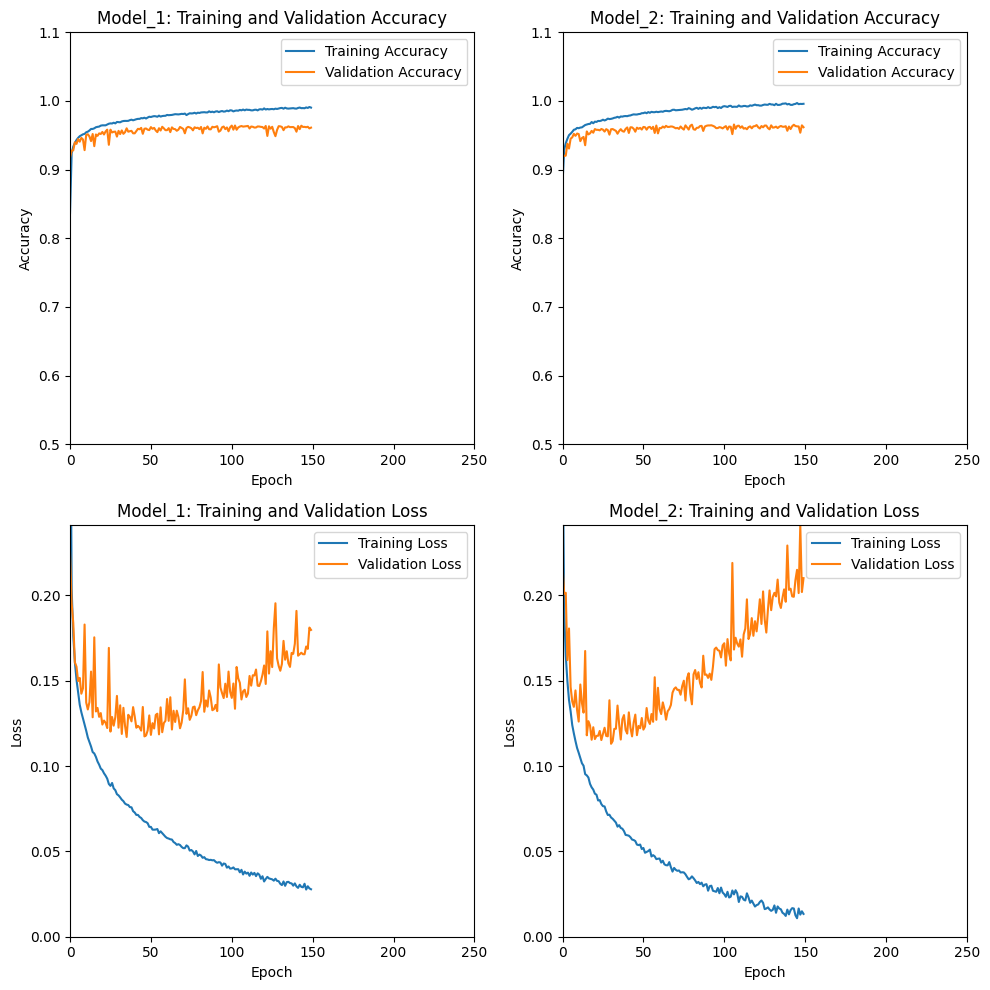

In [ ]:
import matplotlib.pyplot as plt

# Define the axis limits
epoch_limit = [0, 250]
accuracy_limit = [0.5, 1.1]
loss_limit = [0, max(max(history_1.history['val_loss']), max(history_2.history['val_loss']))]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plotting the training and validation accuracy for initial model
axes[0, 0].plot(history_1.history['accuracy'], label='Training Accuracy')
axes[0, 0].plot(history_1.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_title('Model_1: Training and Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xlim(epoch_limit)
axes[0, 0].set_ylim(accuracy_limit)
axes[0, 0].legend()


# Plotting the training and validation accuracy for model_2
axes[0, 1].plot(history_2.history['accuracy'], label='Training Accuracy')
axes[0, 1].plot(history_2.history['val_accuracy'], label='Validation Accuracy')
axes[0, 1].set_title('Model_2: Training and Validation Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_xlim(epoch_limit)
axes[0, 1].set_ylim(accuracy_limit)
axes[0, 1].legend()


# Plotting the training and validation loss for initial model
axes[1, 0].plot(history_1.history['loss'], label='Training Loss')
axes[1, 0].plot(history_1.history['val_loss'], label='Validation Loss')
axes[1, 0].set_title('Model_1: Training and Validation Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_xlim(epoch_limit)
axes[1, 0].set_ylim(loss_limit)
axes[1, 0].legend()

# Plotting the training and validation loss for model 2
axes[1, 1].plot(history_2.history['loss'], label='Training Loss')
axes[1, 1].plot(history_2.history['val_loss'], label='Validation Loss')
axes[1, 1].set_title('Model_2: Training and Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_xlim(epoch_limit)
axes[1, 1].set_ylim(loss_limit)
axes[1, 1].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=20,  # Number of epochs with no improvement after which training will be stopped
                               verbose=1,
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Train the model with early stopping
history_3 = model_1.fit(train_embeddings, train_labels,
                      epochs=200,
                      batch_size=10,
                      validation_data=(validation_embeddings, validation_labels),
                      callbacks=[early_stopping])  # Add early stopping here

# Evaluate the model on the test set
loss, accuracy = model_1.evaluate(test_embeddings, test_labels)
print(f'Test accuracy: {accuracy*100:.2f}%')

Epoch 1/200
2434/2434 [==============================] - 7s 3ms/step - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.1774 - val_accuracy: 0.9581
Epoch 2/200
2434/2434 [==============================] - 8s 3ms/step - loss: 0.0273 - accuracy: 0.9902 - val_loss: 0.1746 - val_accuracy: 0.9612
Epoch 3/200
2434/2434 [==============================] - 7s 3ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.1837 - val_accuracy: 0.9576
Epoch 4/200
2434/2434 [==============================] - 7s 3ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.1718 - val_accuracy: 0.9627
Epoch 5/200
2434/2434 [==============================] - 8s 3ms/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 0.1820 - val_accuracy: 0.9561
Epoch 6/200
2434/2434 [==============================] - 7s 3ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.1751 - val_accuracy: 0.9622
Epoch 7/200
2434/2434 [==============================] - 7s 3ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.1703 - val_ac

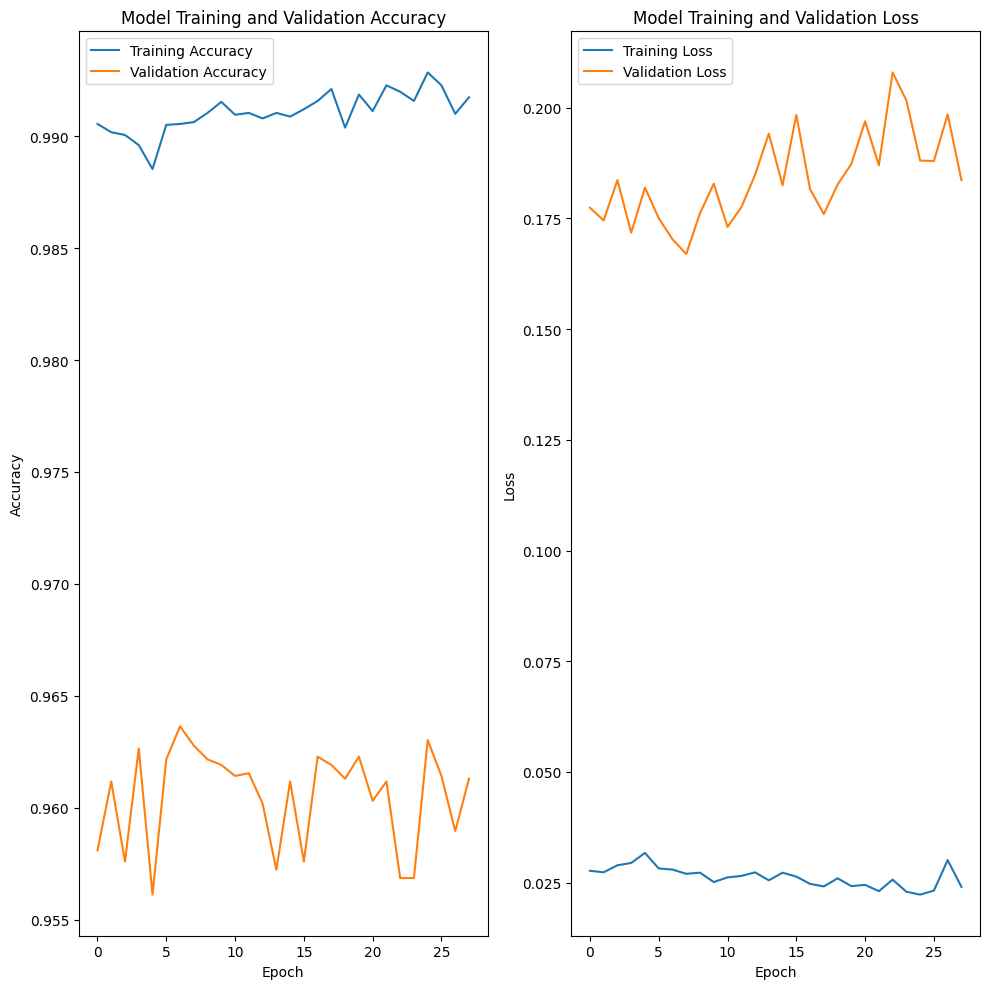

In [ ]:
import matplotlib.pyplot as plt

# Define the axis limits
epoch_limit = [0, 200]
accuracy_limit = [0.5, 1.1]
loss_limit = [0, max(max(history_1.history['val_loss']), max(history_2.history['val_loss']))]

# Assuming history_3 is the history object from training your model
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))  # Adjusted figsize for better layout

# Plotting the training and validation accuracy
axes[0].plot(history_3.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_3.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
# axes[0].set_xlim(epoch_limit)  # Define epoch_limit if needed
# axes[0].set_ylim(accuracy_limit)  # Define accuracy_limit if needed
axes[0].legend()

# Plotting the training and validation loss
axes[1].plot(history_3.history['loss'], label='Training Loss')
axes[1].plot(history_3.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
# axes[1].set_xlim(epoch_limit)  # Define epoch_limit if needed
# axes[1].set_ylim(loss_limit)  # Define loss_limit if needed
axes[1].legend()

plt.tight_layout()  # Adjust layout to make room for the plots' titles and labels
plt.show()


In [ ]:
# Save the entire model as a `.keras` zip archive.
model_1.save('fasttext_multi.keras')

In [ ]:
df_test_embeddings = pd.DataFrame(test_embeddings)
df_test_embeddings.to_csv('/content/df_test_embeddings.csv', index=False)

In [ ]:
# Predict labels for the test set
y_pred_probabilities_3 = model_1.predict(test_embeddings)

# Convert probabilities to binary labels based on a threshold (e.g., 0.5)
y_pred_3 = np.round(y_pred_probabilities_3).astype(int).flatten()

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming `test_labels` is a 1D array of your true binary labels
# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_3, average='binary')
recall = recall_score(test_labels, y_pred_3, average='binary')
f1 = f1_score(test_labels, y_pred_3, average='binary')

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

254/254 [==============================] - 0s 1ms/step
Precision: 0.959, Recall: 0.956, F1 Score: 0.957
